In [25]:
# [모듈 및 데이터 로딩]
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np

korea_df = pd.read_csv('korea_total_data.csv')
world_df = pd.read_csv('world_total_data.csv')
k_sea_df = pd.read_csv('korea_sea.csv')
fish_df = pd.read_csv('fish.csv')

In [26]:
fish_df

,연도,고등어류,멸치,살오징어,꽁치,명태,도루묵
0,1970,"38,256","54,047","72,142","25,036","13,418","16,110"
1,1975,"70,123","175,451","37,238","25,958","4,540","7,267"
2,1980,"62,690","169,657","48,490","12,395","28,112","4,348"
3,1985,"68,479","143,512","42,879","4,393","46,496","7,100"
4,1986,"103,511","201,642","37,214","6,619","46,890","9,346"
5,1987,"101,337","167,729","60,930","5,927","20,162","12,169"
6,1988,"162,828","126,112","49,525","2,535","13,348","4,099"
7,1989,"163,617","131,855","65,885","3,367","15,786","2,470"
8,1990,"96,297","130,192","74,172","5,301","9,798","3,137"
9,1991,"89,738","124,513","107,607","2,954","10,104","5,026"


In [27]:
# [2] 기본 정보 확인 - 숫자형 데이터인지
print(korea_df.info())
print(world_df.info())
print(k_sea_df.info())
print(fish_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        56 non-null     int64  
 1   해수면 평균높이  32 non-null     float64
 2   해수면 평균온도  56 non-null     float64
 3   평균기온      49 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연도         144 non-null    int64  
 1   해수면 평균높이1  134 non-null    float64
 2   해수면 평균온도   133 non-null    float64
 3   평균기온       132 non-null    float64
 4   해수면 평균높이2  29 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------

In [28]:
# fish에서 ',' 제거하고 int로 바꾸기
# regex=True : 정규표현식, 콤마가 어디에 있든(문자열 내부에 있든) 찾아서 변경
fish_list=['고등어류','멸치','살오징어','꽁치','명태','도루묵']
fish_df[fish_list]=fish_df[fish_list].replace(',','',regex=True)
fish_df=fish_df.astype(int)
print(fish_df.dtypes)

연도      int64
고등어류    int64
멸치      int64
살오징어    int64
꽁치      int64
명태      int64
도루묵     int64
dtype: object


In [29]:
# [3] fish_df와 k_sea_df merge
merged_df=pd.merge(fish_df, k_sea_df, how='inner', on='연도')
merged_df

,연도,고등어류,멸치,살오징어,꽁치,명태,도루묵,해수면 평균온도,해수면 평균높이
0,1970,38256,54047,72142,25036,13418,16110,-1.1,NaN
1,1975,70123,175451,37238,25958,4540,7267,-0.2,NaN
2,1980,62690,169657,48490,12395,28112,4348,-1.2,NaN
3,1985,68479,143512,42879,4393,46496,7100,-0.5,NaN
4,1986,103511,201642,37214,6619,46890,9346,-0.9,NaN
5,1987,101337,167729,60930,5927,20162,12169,-0.7,NaN
6,1988,162828,126112,49525,2535,13348,4099,-0.2,NaN
7,1989,163617,131855,65885,3367,15786,2470,-0.5,0.0
8,1990,96297,130192,74172,5301,9798,3137,0.1,-0.9
9,1991,89738,124513,107607,2954,10104,5026,-0.6,-0.1


In [30]:
# 한류성 어종(꽁치, 명태, 도루묵)과 난류성 어종(고등어류, 멸치, 살오징어)의 평균 어획량
merged_df["한류성 어종 평균"]=merged_df[['꽁치', '명태', '도루묵']].mean(axis=1)
merged_df["난류성 어종 평균"]=merged_df[['고등어류', '멸치', '살오징어']].mean(axis=1)
merged_df

,연도,고등어류,멸치,살오징어,꽁치,명태,도루묵,해수면 평균온도,해수면 평균높이,한류성 어종 평균,난류성 어종 평균
0,1970,38256,54047,72142,25036,13418,16110,-1.1,NaN,18188.000000,54815.000000
1,1975,70123,175451,37238,25958,4540,7267,-0.2,NaN,12588.333333,94270.666667
2,1980,62690,169657,48490,12395,28112,4348,-1.2,NaN,14951.666667,93612.333333
3,1985,68479,143512,42879,4393,46496,7100,-0.5,NaN,19329.666667,84956.666667
4,1986,103511,201642,37214,6619,46890,9346,-0.9,NaN,20951.666667,114122.333333
5,1987,101337,167729,60930,5927,20162,12169,-0.7,NaN,12752.666667,109998.666667
6,1988,162828,126112,49525,2535,13348,4099,-0.2,NaN,6660.666667,112821.666667
7,1989,163617,131855,65885,3367,15786,2470,-0.5,0.0,7207.666667,120452.333333
8,1990,96297,130192,74172,5301,9798,3137,0.1,-0.9,6078.666667,100220.333333
9,1991,89738,124513,107607,2954,10104,5026,-0.6,-0.1,6028.000000,107286.000000


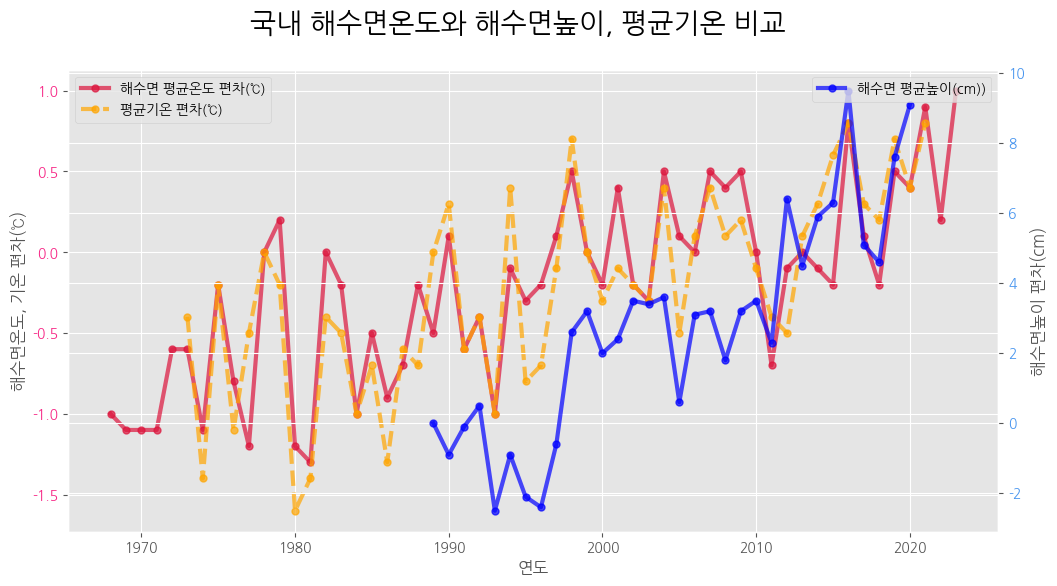

In [31]:
# [5] 데이터 시각화 : 국내 해수면온도와 해수면높이, 평균기온 비교
fig, ax1 = plt.subplots(figsize=(12, 6))

# 한그래프에 y축 오른쪽 왼쪽 다르게 합치기
ax1.plot(korea_df['연도'],korea_df['해수면 평균온도'],label='해수면 평균온도 편차(℃)',marker='o', color='crimson',linewidth=3, markersize=5,alpha=0.7)
ax1.plot(korea_df['연도'],korea_df['평균기온'],'o--',label='평균기온 편차(℃)', color='orange',linewidth=3, markersize=5,alpha=0.7)
ax1.tick_params(axis='y', labelcolor='#f72585')

ax2 = ax1.twinx() # 높이 y축은 오른쪽, 기온 온도는 왼쪽
ax2.plot(korea_df['연도'],korea_df['해수면 평균높이'],label='해수면 평균높이(cm))',marker='o', color='blue',linewidth=3, markersize=5,alpha=0.7)
ax2.tick_params(axis='y', labelcolor='#4895ef')


ax1.set_ylabel("해수면온도, 기온 편차(℃)")
ax2.set_ylabel("해수면높이 편차(cm)")
ax1.set_xlabel("연도")
fig.suptitle("국내 해수면온도와 해수면높이, 평균기온 비교",fontsize=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [32]:
world_df

,연도,해수면 평균높이1,해수면 평균온도,평균기온,해수면 평균높이2
0,1880,0.0,NaN,NaN,NaN
1,1881,5.6,NaN,NaN,NaN
2,1882,-11.2,NaN,NaN,NaN
3,1883,-5.9,NaN,NaN,NaN
4,1884,15.0,NaN,NaN,NaN
...,...,...,...,...,...
139,2019,NaN,0.2,0.3,240.8
140,2020,NaN,0.2,0.3,243.6
141,2021,NaN,0.1,0.2,248.8
142,2022,NaN,0.2,0.2,NaN


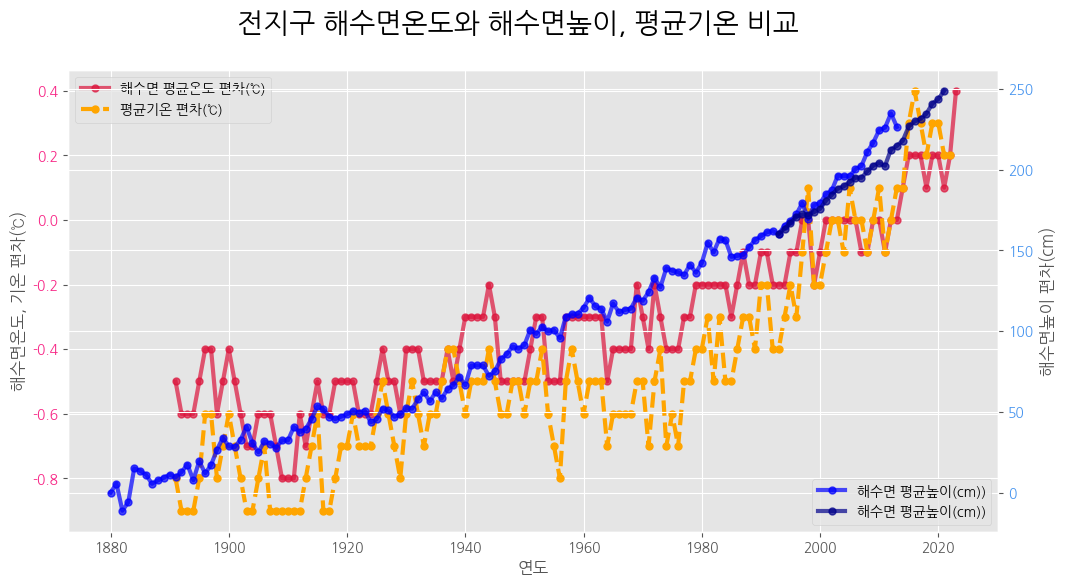

In [33]:
# [6] 데이터 시각화 : 전지구 해수면온도와 해수면높이, 평균기온 비교
fig, ax1 = plt.subplots(figsize=(12, 6))

# 한그래프에 y축 오른쪽 왼쪽 다르게 합치기
ax1.plot(world_df['연도'],world_df['해수면 평균온도'],label='해수면 평균온도 편차(℃)',
         marker='o', color='crimson',linewidth=3, markersize=5,alpha=0.7)
ax1.plot(world_df['연도'],world_df['평균기온'],'o--',label='평균기온 편차(℃)', 
         color='orange',linewidth=3, markersize=5)
ax1.tick_params(axis='y', labelcolor='#f72585')

ax2 = ax1.twinx() # 높이 y축은 오른쪽, 기온 온도는 왼쪽
ax2.plot(world_df['연도'],world_df['해수면 평균높이1'],label='해수면 평균높이(cm))',
         marker='o', color='blue',linewidth=3, markersize=5,alpha=0.7)
ax2.plot(world_df['연도'],world_df['해수면 평균높이2'],label='해수면 평균높이(cm))',
         marker='o', color='darkblue',linewidth=3, markersize=5,alpha=0.7)
ax2.tick_params(axis='y', labelcolor='#4895ef')


ax1.set_ylabel("해수면온도, 기온 편차(℃)")
ax2.set_ylabel("해수면높이 편차(cm)")
ax1.set_xlabel("연도")
fig.suptitle("전지구 해수면온도와 해수면높이, 평균기온 비교",fontsize=20)
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()

In [34]:
merged_df.shape

(36, 11)

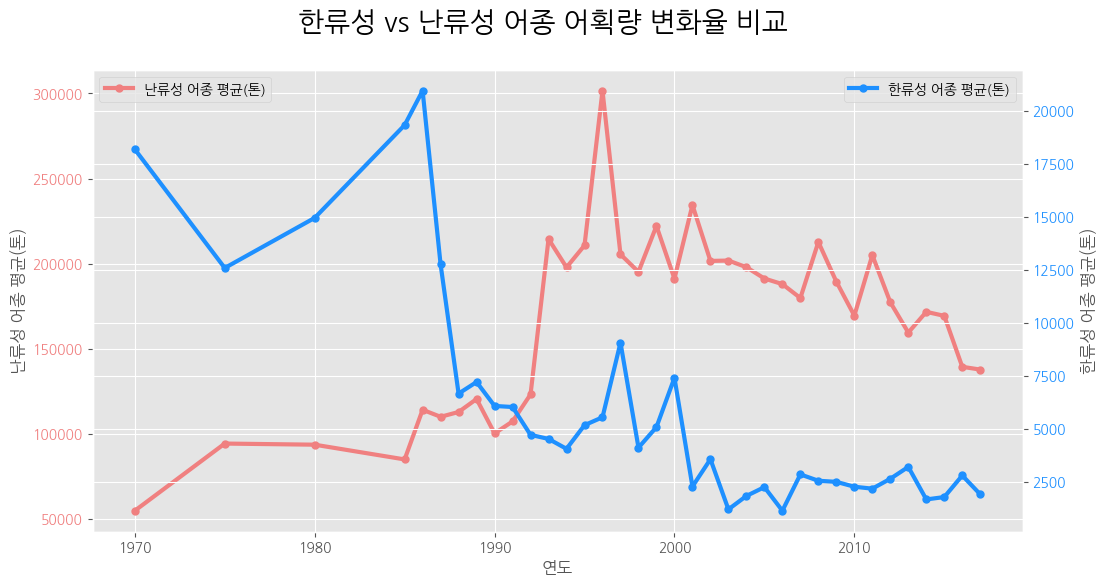

In [35]:
# [7] 데이터 시각화 : 난류성, 한류성 평균 비교 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))
# 한그래프에 y축 오른쪽 왼쪽 다르게 합치기
ax1.plot(merged_df['연도'],merged_df['난류성 어종 평균'],label='난류성 어종 평균(톤)',
         marker='o', color='lightcoral',linewidth=3, markersize=5)
ax1.tick_params(axis='y', labelcolor='lightcoral')

ax2 = ax1.twinx() # 높이 y축은 오른쪽, 기온 온도는 왼쪽
ax2.plot(merged_df['연도'],merged_df['한류성 어종 평균'],label='한류성 어종 평균(톤)',
         marker='o', color='dodgerblue',linewidth=3, markersize=5)
ax2.tick_params(axis='y', labelcolor='dodgerblue')

ax1.set_ylabel("난류성 어종 평균(톤)")
ax2.set_ylabel("한류성 어종 평균(톤)")
ax1.set_xlabel("연도")
fig.suptitle("한류성 vs 난류성 어종 어획량 변화율 비교",fontsize=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

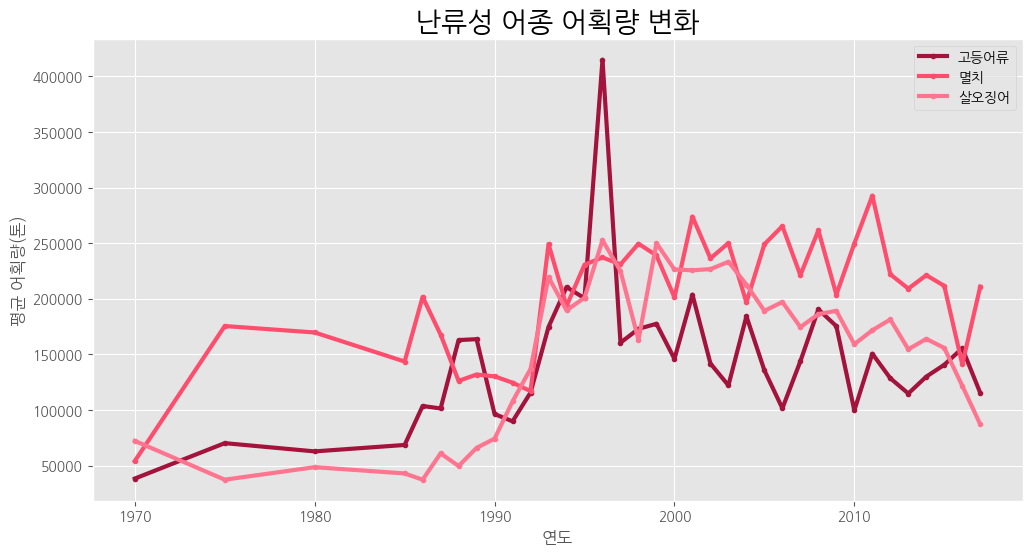

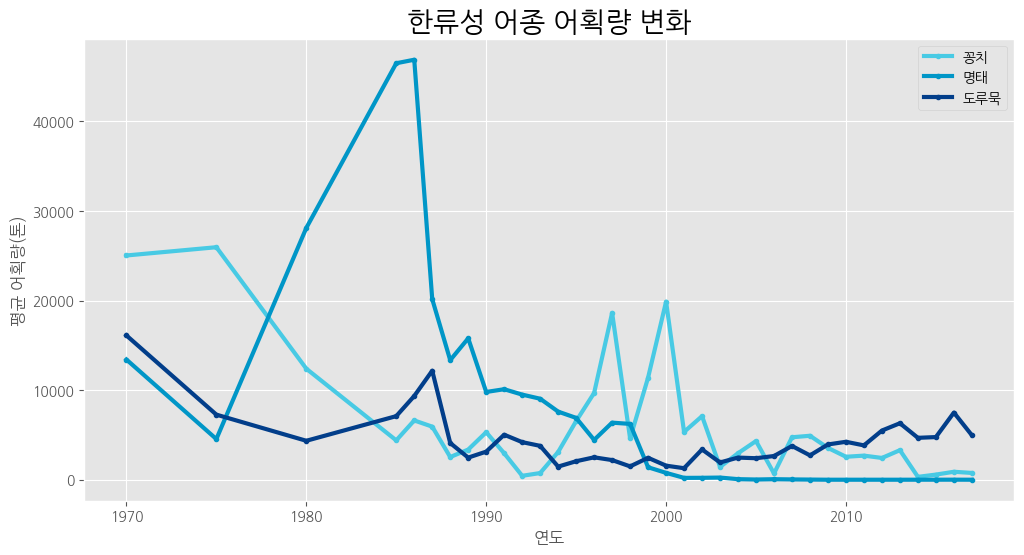

In [36]:
# [8] 각 어종별 어획량 변화
colors=['#a4133c','#ff4d6d','#ff758f','#48cae4','#0096c7','#023e8a']

plt.figure(figsize=((12, 6)))
for i,fish in enumerate(fish_list[:3]):
    plt.plot(merged_df['연도'],merged_df[fish],
             label=fish,marker='o', color=colors[i],
             linewidth=3,markersize=3)
plt.title("난류성 어종 어획량 변화",fontsize=20)
plt.xlabel("연도") 
plt.ylabel("평균 어획량(톤)")  
plt.legend()
plt.show()

plt.figure(figsize=((12, 6)))
for i,fish in enumerate(fish_list[3:]):
    plt.plot(merged_df['연도'],merged_df[fish],
             label=fish,marker='o', color=colors[i+3],
             linewidth=3,markersize=3)
plt.title("한류성 어종 어획량 변화",fontsize=20)
plt.xlabel("연도")  
plt.ylabel("평균 어획량(톤)")  #
plt.legend()
plt.show()



In [37]:
# 해수면 높이상승으로 인해 무엇이 바뀌었을까? -> 연안침식?
erosion_df = pd.read_csv("coastal erosion.csv", encoding="utf-8")

erosion_df

,연도,A등급,B등급,C등급,D등급,총개소,우심지역(C+D),침식 우심률(%)
0,2003년,NaN,26,28,8,62,36,58.1
1,2004년,NaN,25,29,8,62,37,59.7
2,2005년,2.0,33,21,6,62,27,43.5
3,2006년,2.0,30,16,14,62,30,48.4
4,2007년,9.0,57,34,20,120,54,45.0
5,2008년,9.0,60,35,16,120,51,42.5
6,2009년,13.0,52,39,16,120,55,45.8
7,2010년,10.0,55,65,27,157,92,58.6
8,2011년,3.0,53,78,26,160,104,65.0
9,2012년,2.0,44,102,24,172,126,73.3


In [38]:
print(erosion_df.dtypes)

연도            object
A등급          float64
B등급            int64
C등급            int64
D등급            int64
총개소            int64
우심지역(C+D)      int64
침식 우심률(%)    float64
dtype: object


In [39]:
# 연도 컬럼에서 '년' 없애고 int로 바꾸기
erosion_df['연도']=erosion_df['연도'].replace('년','',regex=True)
erosion_df

,연도,A등급,B등급,C등급,D등급,총개소,우심지역(C+D),침식 우심률(%)
0,2003,NaN,26,28,8,62,36,58.1
1,2004,NaN,25,29,8,62,37,59.7
2,2005,2.0,33,21,6,62,27,43.5
3,2006,2.0,30,16,14,62,30,48.4
4,2007,9.0,57,34,20,120,54,45.0
5,2008,9.0,60,35,16,120,51,42.5
6,2009,13.0,52,39,16,120,55,45.8
7,2010,10.0,55,65,27,157,92,58.6
8,2011,3.0,53,78,26,160,104,65.0
9,2012,2.0,44,102,24,172,126,73.3


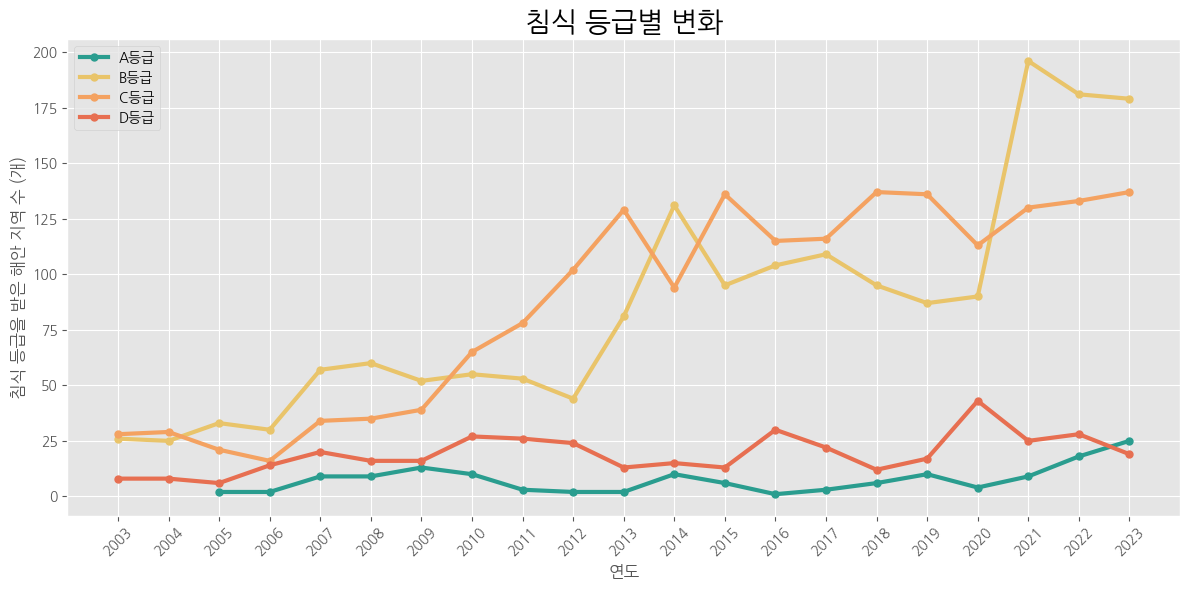

In [41]:
# 색상 및 등급 설정
colors2 = ['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
grades = ['A등급', 'B등급', 'C등급', 'D등급']
plt.figure(figsize=(12,6))
# 침식 등급별 변화
for i, grade in enumerate(grades):
    plt.plot(erosion_df['연도'], erosion_df[grade], label=grade, color=colors2[i],
                    marker='o', linewidth=3, markersize=5)

plt.title("침식 등급별 변화", fontsize=20)
plt.xlabel("연도")
plt.ylabel("침식 등급을 받은 해안 지역 수 (개)")
plt.legend()
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


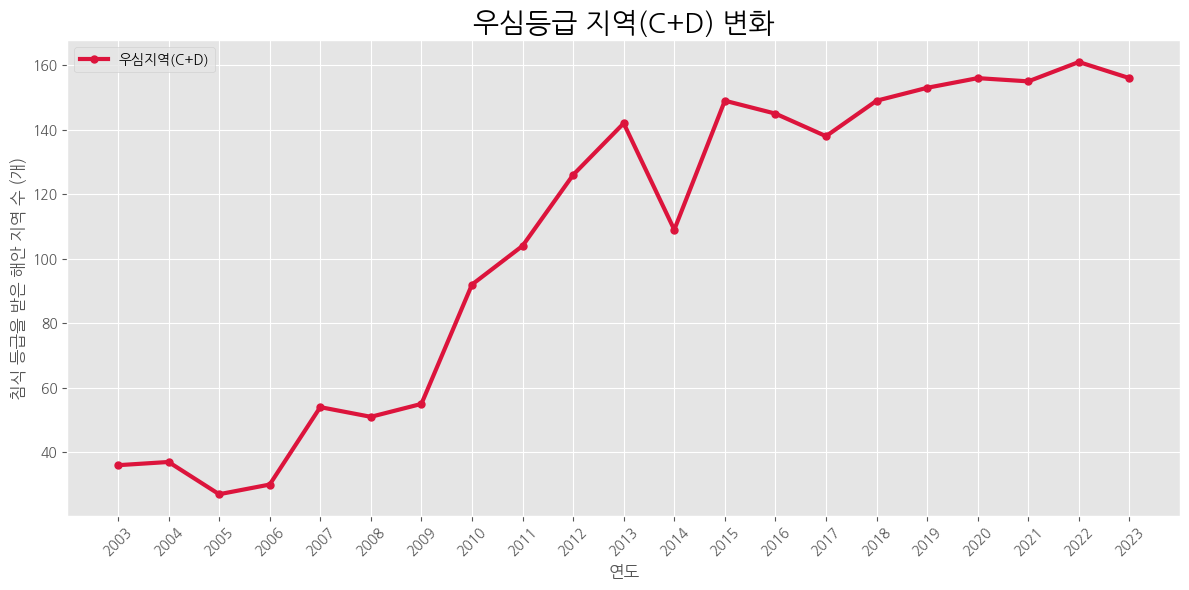

In [42]:
# [11] 우심지역 변화
plt.figure(figsize=(12,6))
# 침식 등급별 변화
plt.plot(erosion_df['연도'], erosion_df['우심지역(C+D)'], label='우심지역(C+D)', color='crimson',
         marker='o', linewidth=3, markersize=5)

plt.title("우심등급 지역(C+D) 변화", fontsize=20)
plt.xlabel("연도")
plt.ylabel("침식 등급을 받은 해안 지역 수 (개)")
plt.legend()
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

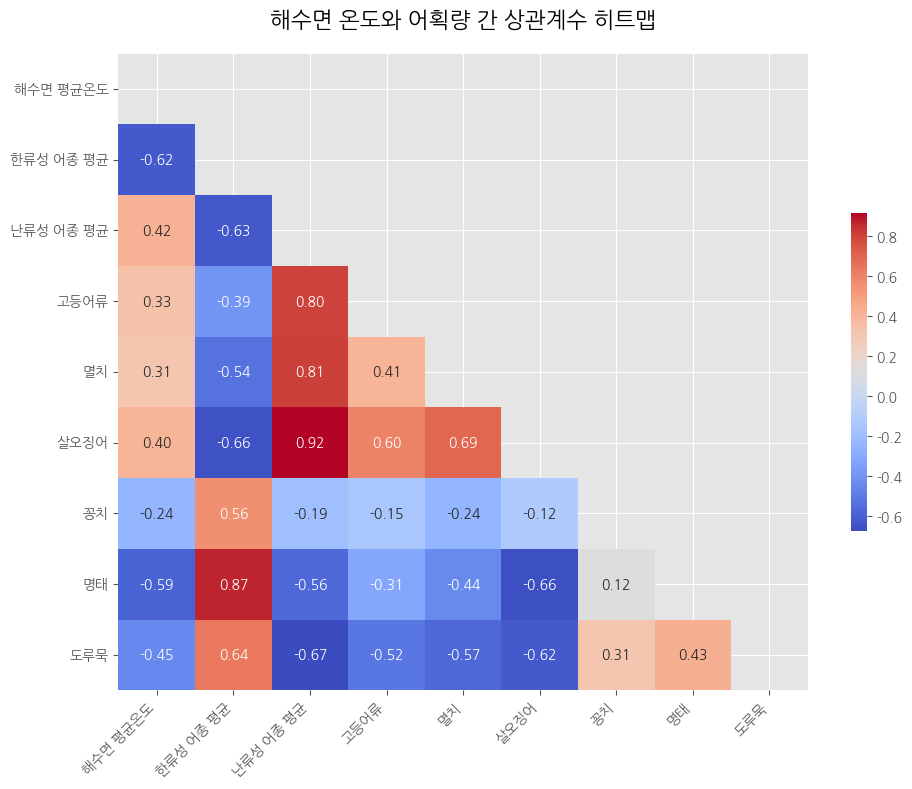

In [43]:
# [12] 지표와 진단결과 상관관계 ->heatmap
# 상관계수 계산
correlation_matrix = merged_df[['해수면 평균온도','한류성 어종 평균','난류성 어종 평균'] + fish_list].corr()
correlation_matrix

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# 상관관계계수 대입
plt.figure(figsize=(10,8))
# cmap=sns.color_palette("YlOrBr_r", as_cmap=True)
sns.heatmap(correlation_matrix,
            cmap='coolwarm', cbar_kws={"shrink": .5}, # 절대값 사용하면 색상이 진할수록 관계가 있다는 것을 의미함
            mask=mask,annot=correlation_matrix, fmt=".2f")  # 히트맵 위에 표시되는 값은 부호가 있는 상관관계계수 값

plt.title("해수면 온도와 어획량 간 상관계수 히트맵", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


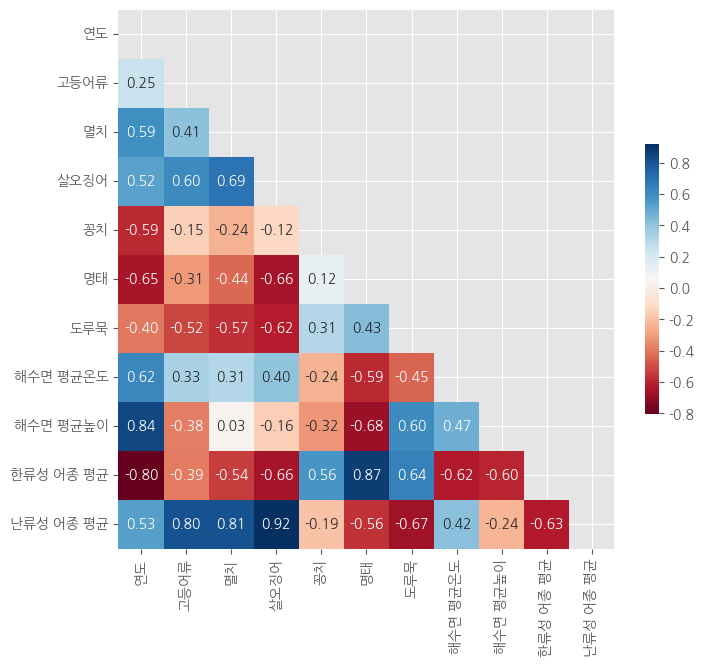

In [44]:
# [13] 상관관계계수 계산
correlation = merged_df.corr(numeric_only=True)

# 히트맵 모양 대각선으로 자르기
mask = np.triu(np.ones_like(correlation, dtype=bool))
# np.ones_like() 함수로 correlation과 동일한 모양과 크기를 가지는 모든 요소가 True인 배열을 생성
# np.triu() 함수는 상삼각 행렬(Upper triangular matrix)를 생성
# 즉, 대각선 및 그 위의 요소들은 True, 그 아래의 요소들은 False로 설정됨

# 상관관계계수 대입
plt.figure(figsize=(8, 7))
cmap=sns.color_palette("RdBu", as_cmap=True)
sns.heatmap(correlation,
            cmap=cmap, cbar_kws={"shrink": .5}, # 절대값 사용하면 색상이 진할수록 관계가 있다는 것을 의미함
            mask=mask,annot=correlation, fmt=".2f")  # 히트맵 위에 표시되는 값은 부호가 있는 상관관계계수 값

plt.show()

In [45]:
erosion_df['연도']

0     2003
1     2004
2     2005
3     2006
4     2007
5     2008
6     2009
7     2010
8     2011
9     2012
10    2013
11    2014
12    2015
13    2016
14    2017
15    2018
16    2019
17    2020
18    2021
19    2022
20    2023
Name: 연도, dtype: object

In [46]:
# [14] erosion_df k_sea_df merge
# erosion_df의 연도를 int 타입으로 변환
erosion_df['연도']=erosion_df['연도'].astype(int)
merged2_df=pd.merge(erosion_df, k_sea_df, how='inner', on='연도')
merged2_df

,연도,A등급,B등급,C등급,D등급,총개소,우심지역(C+D),침식 우심률(%),해수면 평균온도,해수면 평균높이
0,2003,NaN,26,28,8,62,36,58.1,-0.3,3.4
1,2004,NaN,25,29,8,62,37,59.7,0.5,3.6
2,2005,2.0,33,21,6,62,27,43.5,0.1,0.6
3,2006,2.0,30,16,14,62,30,48.4,0.0,3.1
4,2007,9.0,57,34,20,120,54,45.0,0.5,3.2
5,2008,9.0,60,35,16,120,51,42.5,0.4,1.8
6,2009,13.0,52,39,16,120,55,45.8,0.5,3.2
7,2010,10.0,55,65,27,157,92,58.6,0.0,3.5
8,2011,3.0,53,78,26,160,104,65.0,-0.7,2.3
9,2012,2.0,44,102,24,172,126,73.3,-0.1,6.4


In [1]:
# [14] 해수면 높이와 우심지역건수 상관관계
# 상관계수 계산
correlation_matrix = merged2_df[['해수면 평균높이','우심지역(C+D)','연도'] + grades+ ['우심지역(C+D)']].corr()
correlation_matrix

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# 상관관계계수 대입
plt.figure(figsize=(10,8))
# cmap=sns.color_palette("YlOrBr_r", as_cmap=True)
sns.heatmap(correlation_matrix.abs(),
            cmap='PuBu', cbar_kws={"shrink": .5}, # 절대값 사용하면 색상이 진할수록 관계가 있다는 것을 의미함
            mask=mask,annot=correlation_matrix, fmt=".2f")  # 히트맵 위에 표시되는 값은 부호가 있는 상관관계계수 값

plt.title("해수면 높이와 연안침식 간 상관계수 히트맵", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


NameError: name 'merged2_df' is not defined

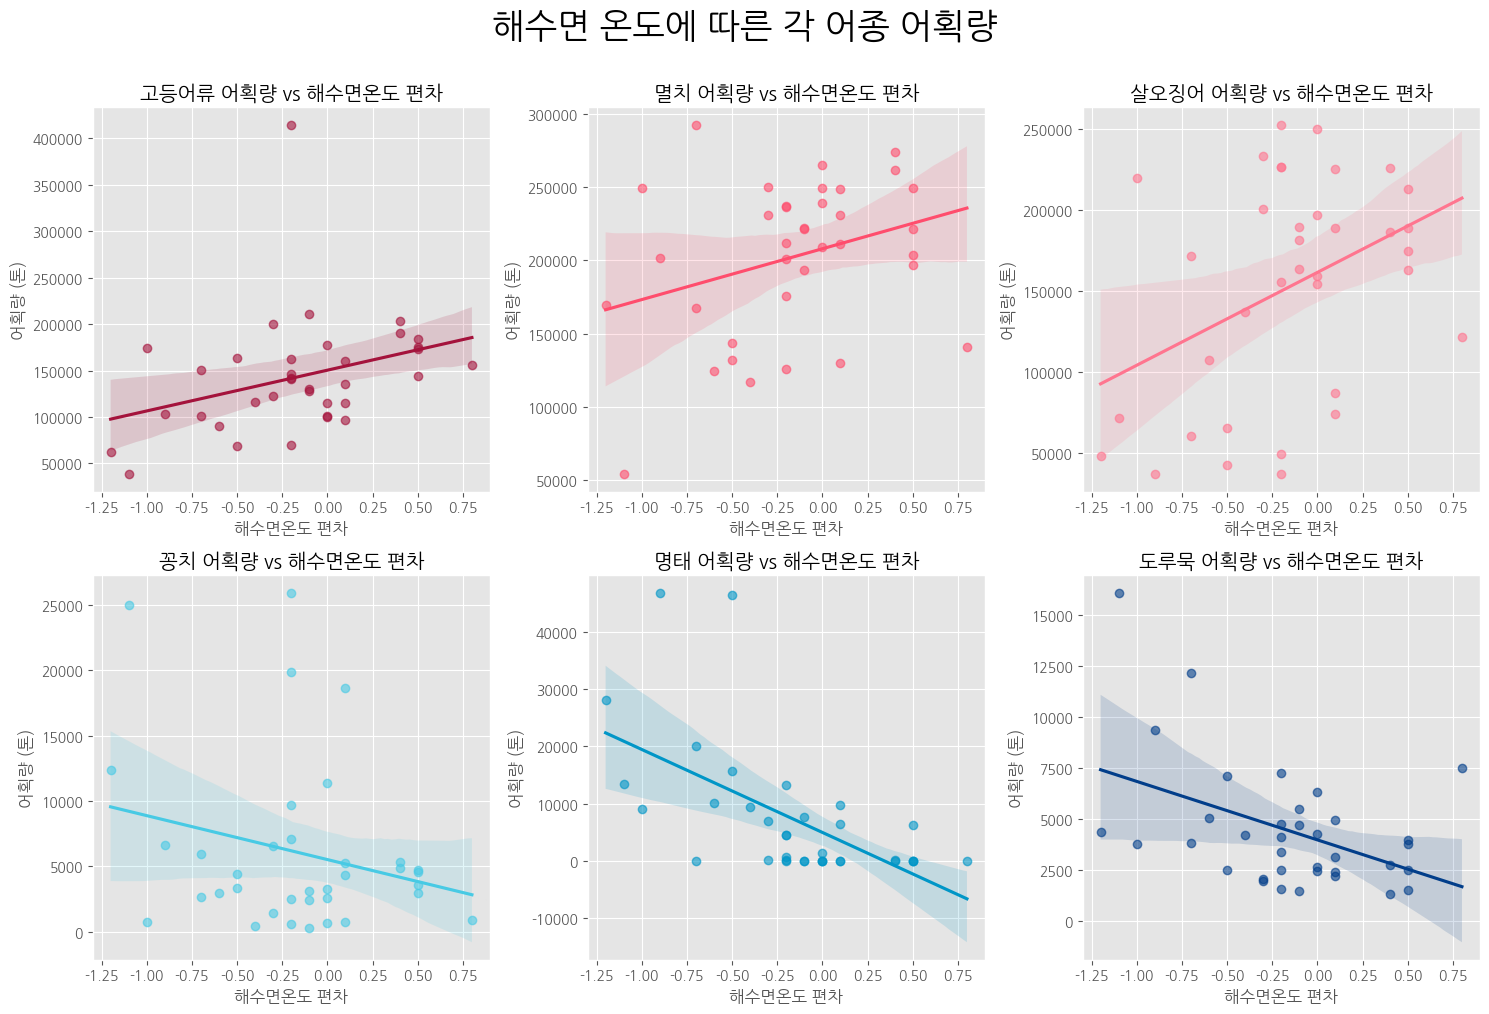

In [48]:
# [9] 해수면 온도에 따른 각 어종 어획량
# 시각화 스타일 설정
plt.style.use('ggplot')

# 1. 산점도(Scatter Plot) + 회귀선 (어종별)
fig, axes = plt.subplots(2, 3, figsize=(15,10))  # 3x2 서브플롯
axes = axes.flatten() # 1차원으로 접근

for i, species in enumerate(fish_list):
    sns.regplot(
        ax=axes[i],
        x=merged_df['해수면 평균온도'],
        y=merged_df[species],
        scatter_kws={'color': colors[i], 'alpha': 0.6},
        line_kws={'color': colors[i]}
    )
    axes[i].set_title(f"{species} 어획량 vs 해수면온도 편차")
    axes[i].set_xlabel("해수면온도 편차")
    axes[i].set_ylabel("어획량 (톤)")
    
plt.suptitle("해수면 온도에 따른 각 어종 어획량",fontsize=25,y=1.01)
plt.tight_layout()
plt.show()